In [ ]:
import scipy.io
import numpy as np
import os
import pyvista as pv

folder_path = r"C:\Users\telukkari\Documents\Data\Wetness_index\nz_wi_soil_for_road_vecs"
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mat')]

# mat_data = scipy.io.loadmat(file)

mat_data = scipy.io.loadmat(r"C:\Users\telukkari\Documents\Data\Wetness_index\nz_wi_soil_for_road_vecs\wetness_index_vec_25466.mat")

data = mat_data['wipnts']
xyz = data[:,:3]
slope = data[:,3]
accumulation = data[:,4]
splitcode = data[:,5]
dist_from_road_vector = data[:,6]
wetness_index = data[:,7]  
soil_type = data[:,8]

print(f"splitcodes: {len(np.unique(splitcode))}")

# Create a point cloud from xyz
point_cloud = pv.PolyData(xyz)

wetness_clipped = np.clip(wetness_index, -1.0, 10.0)

point_cloud['wetness_index'] = wetness_clipped

# Start a plotter
plotter = pv.Plotter()
plotter.add_mesh(
    point_cloud,
    scalars='wetness_index',  # color by wetness index
    cmap='viridis',           # colormap (try 'plasma', 'coolwarm', etc.)
    point_size=5,             # adjust point size
    render_points_as_spheres=True,
    show_scalar_bar=True
)

plotter.show()

splitcodes: 42


Widget(value='<iframe src="http://localhost:57488/index.html?ui=P_0x2404163c050_0&reconnect=auto" class="pyvis…

In [1]:
import os
import json
import tempfile
import requests
import numpy as np

import pdal


workdir  = r"outputs" 
os.makedirs(workdir, exist_ok=True)

# las_path = r"D:\MLS-data\test\cloud_test2_flat_part.las"
# las_path = r"D:\Data\ANNOTATED_NLS_PLOTS\1laz_corrected.las"
las_path = r"D:\Data\mls_road_example.las"
dem_path = os.path.join(workdir, "dem.tif")
twi_path = os.path.join(workdir, "twi.tif")

# DEM gridding settings
resolution = 0.1     #  DEM cell size in meters
idw_radius = 0.2     # search radius for IDW gridding
nodata_val = -1.0


# -----------------------------------------
# 3) Build DEM from LAS using PDAL pipeline
#    - SMRF -> keep ground (Class 2) -> IDW grid to GeoTIFF
# -----------------------------------------
pdal_pipeline = {
    "pipeline": [
        las_path,
        {   # Classify ground using SMRF (tune parameters for your data)
            "type": "filters.smrf",
            "window": 50.0,
            "slope": 0.2,
            "threshold": 0.45,
            "scalar": 1.25
        },
        {   # Keep only ground-classified points (ASPRS class 2)
            "type": "filters.range",
            "limits": "Classification[2:2]"
        },
        {   # Grid ground Z to DEM using IDW
            "type": "writers.gdal",
            "filename": dem_path,
            "resolution": resolution,
            "radius": idw_radius,
            "output_type": "idw",
            "gdaldriver": "GTiff",
            "nodata": nodata_val,
            "override_srs": "EPSG:3067" 
        }
    ]
}


print("Running PDAL pipeline to create DEM ...")
pipe = pdal.Pipeline(json.dumps(pdal_pipeline))
count = pipe.execute()
print(f"PDAL finished, {count} points processed. DEM: {dem_path}")


Running PDAL pipeline to create DEM ...
PDAL finished, 99610 points processed. DEM: outputs\dem.tif


In [1]:
import whitebox

wbt = whitebox.WhiteboxTools()
wbt.work_dir = r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs"

wbt.slope(
    dem=r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.tif",
    output=r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\slope.tif",
    zfactor=1.0,       # adjust if DEM vertical units differ from horizontal units
    units="radians"    # or "radians"
)

.\whitebox_tools.exe --run="Slope" --wd="C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs" --dem='C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.tif' --output='C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\slope.tif' --zfactor='1.0' --units=radians -v --compress_rasters=False

****************************
* Welcome to Slope         *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 12%
Progress: 13%
Progress: 15%


Progress: 16%
Progress: 17%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 23%
Progress: 24%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 38%
Progress: 39%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 49%
Progress: 50%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 60%
Progress: 61%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 67%
Progress: 68%
Progress: 69%
Progress: 71%
Progress: 72%
Progress: 73%
Progress: 75%
Progress: 76%
Progress: 78%
Progress: 79%
Progress: 80%
Progress: 82%
Progress: 83%
Progress: 84%
Progress: 86%
Progress: 87%
Progress: 89%
Progress: 90%
Progress: 91%
Progress: 93%
Progress: 94%
Progress: 95%
Progress: 97%
Progress: 98%
Progress: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.17s


0

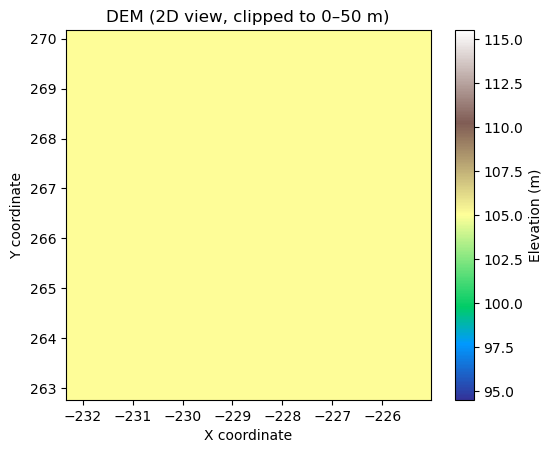

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

dem_path = "outputs/dem.tif"

with rasterio.open(dem_path) as src:
    dem = src.read(1)       # first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Clip elevation values to the range [0, 50]
dem_clipped = np.clip(dem, 105, 107)

plt.imshow(dem_clipped, cmap="terrain", extent=extent)
plt.colorbar(label="Elevation (m)")
plt.title("DEM (2D view, clipped to 0–50 m)")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


Computing Topographic Wetness Index (TWI) with WhiteboxTools ...
.\whitebox_tools.exe --run="WetnessIndex" --wd="outputs" --sca='C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.tif' --slope='C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\slope.tif' --output='C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\twi.tif' -v --compress_rasters=False

****************************
* Welcome to WetnessIndex  *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 12%
Progress: 13%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 23%
Progress: 24%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 38%
Progress: 39%
Pr

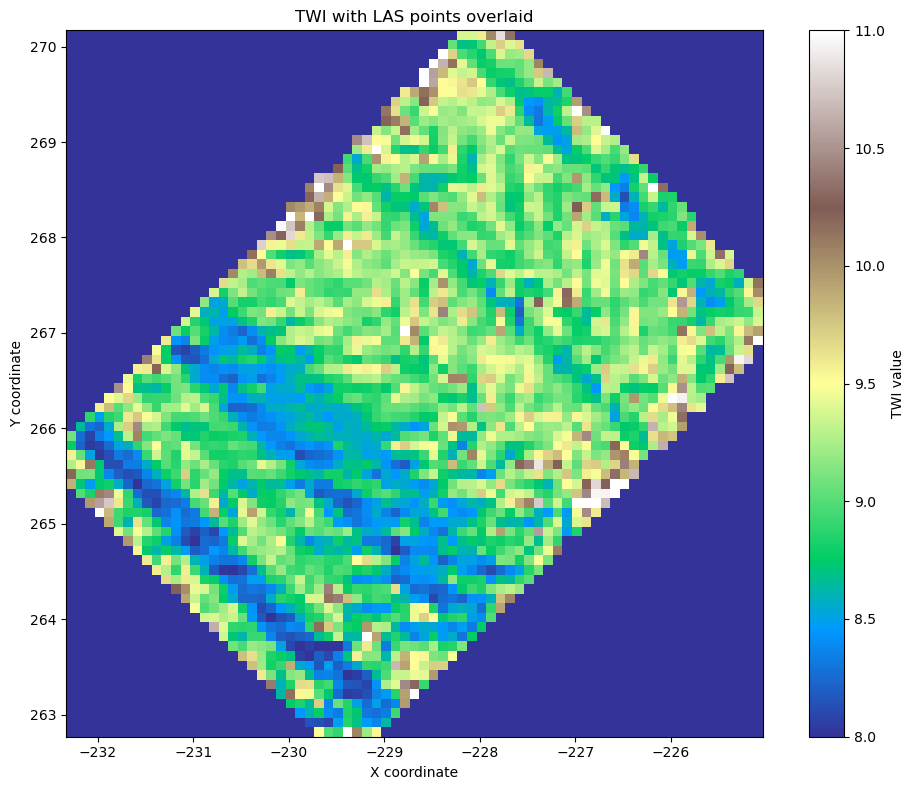

In [ ]:
import whitebox
import laspy
import numpy as np
import pyvista as pv
import rasterio
import matplotlib.pyplot as plt

print("Computing Topographic Wetness Index (TWI) with WhiteboxTools ...")
wbt = whitebox.WhiteboxTools()

wbt.work_dir = r"outputs" 

ok = wbt.wetness_index(r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.tif", r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\slope.tif", r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\twi.tif")

twi_path = r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\twi.tif"

las_path = r"D:\MLS-data\test\cloud_test2_flat_part_ROAD.las"
las = laspy.read(las_path)
x = las.x
y = las.y
z = las.z

xmin, xmax, ymin, ymax = extent
in_bbox = (x >= xmin) & (x <= xmax) & (y >= ymin) & (y <= ymax)

with rasterio.open(twi_path) as src:
    dem = src.read(1)       # first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Clip elevation values to the range [0, 50]
dem_clipped = np.clip(dem, 8, 11)

idx = np.where(in_bbox)[0]
# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 8))
# Use origin='upper' to match typical georasters; extent ensures correct coordinates
im = ax.imshow(dem_clipped, cmap="terrain", extent=extent, origin="upper")
cb = plt.colorbar(im, ax=ax, label="TWI value")

# sc = ax.scatter(x[idx], y[idx], c=z[idx], s=1, linewidths=0, alpha=0.6, cmap="viridis")
# plt.colorbar(sc, ax=ax, label="Point Z (m)")  # change label if you color by intensity, etc.

ax.set_title("TWI with LAS points overlaid")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
plt.tight_layout()
plt.show()

In [11]:
import rasterio
import numpy as np
import laspy

# Input raster and output LAS
twi_path = r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\twi.tif"
las_path = r"C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.las"

# Read TWI raster
with rasterio.open(twi_path) as src:
    twi = src.read(1, masked=True)
    transform = src.transform
    crs = src.crs

# Build coordinate grid (cell centers)
rows, cols = np.meshgrid(np.arange(twi.shape[0]), np.arange(twi.shape[1]), indexing="ij")
xs, ys = rasterio.transform.xy(transform, rows, cols)
xs = np.array(xs).flatten()
ys = np.array(ys).flatten()
zs = np.zeros_like(xs)   # Flat Z = 0, since TWI is not elevation

# Flatten TWI values
twi_vals = twi.data.flatten()

# Mask out no-data
mask = ~twi.mask.flatten()
xs, ys, zs, twi_vals = xs[mask], ys[mask], zs[mask], twi_vals[mask]

# Create LAS header & file
header = laspy.LasHeader(point_format=3, version="1.2")
las = laspy.LasData(header)

# Assign coordinates
las.x = xs
las.y = ys
las.z = zs

# Add extra dimension for TWI
las.add_extra_dim(laspy.ExtraBytesParams(name="TWI", type=np.float32))
las.TWI = twi_vals.astype(np.float32)

# Write LAS
las.write(las_path)
print(f"Wrote LAS with {len(xs)} points and TWI attribute: {las_path}")



Wrote LAS with 58536 points and TWI attribute: C:\Users\telukkari\Documents\Python\forest_road_network_analysis\outputs\dem.las


In [ ]:
# TODO visualize TWI with road

# TODO TWI for road only